# Importing libraries

In [4]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2,glob
from keras.applications.vgg16 import VGG16
from keras import optimizers
from keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
import pdb
from keras.models import load_model
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
%matplotlib inline

# Importing dataset labels

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
file_name = '/content/gdrive/MyDrive/image_names.txt'
with open(file_name) as fil:
 content1 = fil.readlines()

print(content1)

outputs1 = []

for elem in content1:
 if 'N/A' in elem:
   continue
 else:
   line = elem.split('/')
   a = line[5]
   line1 = a.split('\n')
   outputs1.append(line1[0])

print(outputs1)
   

['/Users/anirudhan/Desktop/Dataset_images/emotionet_5_second_50000_50001.jpg\n', '/Users/anirudhan/Desktop/Dataset_images/emotionet_5_second_50000_50006.jpg\n', '/Users/anirudhan/Desktop/Dataset_images/emotionet_5_second_50000_50023.jpg\n', '/Users/anirudhan/Desktop/Dataset_images/emotionet_5_second_50000_50024.jpg\n', '/Users/anirudhan/Desktop/Dataset_images/emotionet_5_second_50000_50073.jpg\n', '/Users/anirudhan/Desktop/Dataset_images/emotionet_5_second_50000_50074.jpg\n', '/Users/anirudhan/Desktop/Dataset_images/emotionet_5_second_50000_50107.jpg\n', '/Users/anirudhan/Desktop/Dataset_images/emotionet_5_second_50000_50122.jpg\n', '/Users/anirudhan/Desktop/Dataset_images/emotionet_5_second_50000_50150.jpg\n', '/Users/anirudhan/Desktop/Dataset_images/emotionet_5_second_50000_50181.jpg\n', '/Users/anirudhan/Desktop/Dataset_images/emotionet_5_second_50000_50188.jpg\n', '/Users/anirudhan/Desktop/Dataset_images/emotionet_5_second_50000_50210.jpg\n', '/Users/anirudhan/Desktop/Dataset_image

In [5]:
file_name = '/content/gdrive/MyDrive/AU_video.txt'
with open(file_name) as fil:
 content = fil.readlines()

outputs = []

for elem in content:
 if 'N/A' in elem:
   continue
 else:
   line = elem.split(',')
   outputs.append([int(line[1]),int(line[3]),int(line[5]),int(line[7]),int(line[9]),int(line[11])])

print(outputs)
# always the outputs correspond to (in that order): wrinkles, freakles, glasses, hair color, hair top, no face shown or not human



#labels for wrinkles
wrinkles_labels = [[item[0]] for item in outputs]
wrinkles_labels = np.array(wrinkles_labels)
print(wrinkles_labels.shape)

#labels for freakles
freakles_labels = [[item[1]] for item in outputs]
freakles_labels = np.array(freakles_labels)
print(freakles_labels.shape)

#labels for glasses
glasses_labels = [[item[2]] for item in outputs]
glasses_labels = np.array(glasses_labels)
print(glasses_labels.shape)

#labels for hair color
haircolor_labels = [[item[3]] for item in outputs]
haircolor_labels = np.array(haircolor_labels)
print(haircolor_labels.shape)

#labels for hair top
hairtop_labels = [[item[4]] for item in outputs]
hairtop_labels = np.array(hairtop_labels)
print(hairtop_labels.shape)

[[1, 0, 0, 8, 1, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 8, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 3, 2, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 1, 2, 0], [1, 1, 0, 8, 1, 0], [0, 0, 0, 1, 2, 0], [1, 0, 0, 1, 2, 0], [0, 0, 0, 8, 2, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 8, 2, 0], [1, 0, 0, 8, 2, 0], [0, 0, 0, 3, 2, 0], [1, 0, 0, 3, 2, 0], [0, 0, 0, 1, 2, 1], [0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 2, 2, 0], [1, 0, 0, 1, 2, 0], [1, 0, 0, 6, 1, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 1, 3, 0], [0, 0, 0, 3, 2, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 3, 3, 0], [1, 0, 0, 1, 3, 0], [0, 0, 0, 6, 2, 0], [1, 0, 0, 0, 1, 0], [0, 0, 0, 1, 3, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 1, 3, 0], [0, 0, 0, 0, 2, 0], [1, 0, 0, 1, 2, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 1, 3, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 1, 3, 0], [0, 0, 0, 0, 2, 0], [1, 0, 0, 1, 1, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 0, 2, 0], [1, 0, 0, 0, 2, 0], [0, 0, 0, 3, 2, 0], [1, 0, 0, 0, 3, 0], [0, 0, 0, 1, 3, 0], [0, 0, 0, 6, 2, 0],

The below code is used to export the data into a annotations.csv

In [ ]:

# annotations = pd.DataFrame({
#     'Image_name': outputs1,
#     'wrinkles': [item[0] for item in outputs],
#     'freakles': [item[1] for item in outputs],
#     'glasses': [item[2] for item in outputs],
#     'hair_color': [item[3] for item in outputs],
#     'hair_top': [item[4] for item in outputs]
# })

# print(annotations)

# from google.colab import files
# annotations.to_csv('annotations.csv') 
# files.download('annotations.csv')

# Importing dataset images 

- Importing data from the images file


In [7]:
#this code is used to unzip a zip file that consists of dataset images

#!unzip /content/gdrive/MyDrive/Dataset_images.zip

In [8]:
items = glob.glob('/content/Dataset_images/*')

#print(len(items))
images = []

for label in outputs1:
  for each_image in items:
# the if statement is added to get the images in the right order
    if ('/content/Dataset_images/' + label) == each_image:
      image = cv2.imread(each_image)
      image = cv2.resize(image, (96,96))
      images.append(image)

      

images = np.array(images)
np.shape(images)
#!rm -rf /content/Dataset_images

(1999, 96, 96, 3)

# Face detection

- cropping data for Face detection using cascadeclassifier

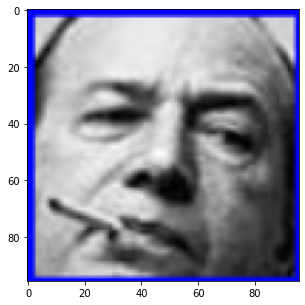

(1999, 96, 96, 3)

In [9]:
img = []
# Read the input image
for label in outputs1:
  for each_image in items:
# the if statement is added to get the images in the right order
    if ('/content/Dataset_images/' + label) == each_image:
      image = cv2.imread(each_image)
# Convert into grayscale
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')  
      # Detect faces
      faces = face_cascade.detectMultiScale(gray, 1.1, 4)
      for (x, y, w, h) in faces:
          cv2.rectangle(image, (x, y), (x+w, y+h), 
                        (0, 0, 255), 2)
          faces = image[y:y + h, x:x + w]
      try:
        faces = cv2.resize(faces, (96,96))
        img.append(faces)
      except:
        image = cv2.resize(image, (96,96))
        img.append(image)

#print(len(img))
img = np.array(img)
np.shape(img)
plt.figure(figsize=(5,5))
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()

img = np.array(img)
np.shape(img)

# Training model for wrinkles attributes

- Preprocessing: Normalizing i.e. scaling the pixels to 0-1 from 0-255

- Splitting images and attribute for training and testing

- Data Augmentation


In [ ]:
#splitting dataset into training and testing
train_images, test_images, wrinkles_train_labels, wrinkles_test_labels = train_test_split(img, wrinkles_labels, test_size=0.2, shuffle = False)

#normalizaiton
train_images, test_images = train_images / 255.0, test_images / 255.0

data_augmentation = keras.Sequential(
    [   #preprocessing.Resizing(height=32, width=32, interpolation="bilinear"),
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        #preprocessing.RandomZoom(0.1),
    ]
)

# Create a model that includes the augmentation stage
input_shape = (96, 96, 3)
classes = 10


inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)


- Using the built-in Keras code and weights of VGG16

- training the model

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 96, 96, 3)         0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4096)              18878464  
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4097

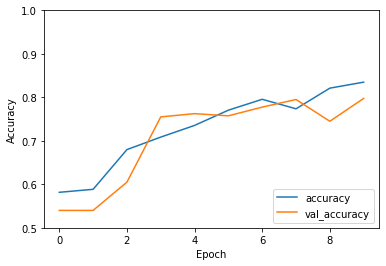

In [ ]:

# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=input_shape) (x)


# add new classifier layers
flat1 = layers.Flatten()(model)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(10, activation='softmax')(fc2)


# define new model
model = Model(inputs=inputs, outputs=output)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

# define the checkpoint
filepath = "VGG16_for_wrinkles-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]
batch_size = 32

# Training
history = model.fit(train_images, wrinkles_train_labels, shuffle = True, steps_per_epoch=len(train_images) // batch_size ,epochs=10,
                    validation_data=(test_images, wrinkles_test_labels), callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


y_pred1 = model.predict(test_images)
y_pred = np.argmax(y_pred1, axis=1)



# Print f1, precision, accuracy and recall scores
print(f'F1 Score: {f1_score(wrinkles_test_labels, y_pred , average="weighted")}')
print(f'Precision Score: {precision_score(wrinkles_test_labels, y_pred , average="weighted")}')
print(f'Recall Score: {recall_score(wrinkles_test_labels, y_pred , average="weighted")}')
print(f'Accuracy Score: {accuracy_score(wrinkles_test_labels, y_pred)}')


# Training model for freakles attribute

- Preprocessing: Normalizing i.e. scaling the pixels to 0-1 from 0-255

- Splitting images and attribute for training and testing

- Data Augmentation


In [10]:
#splitting dataset into training and testing
train_images, test_images, freakles_train_labels, freakles_test_labels = train_test_split(img, freakles_labels, test_size=0.2, shuffle = False)

#normalizaiton
train_images, test_images = train_images / 255.0, test_images / 255.0


data_augmentation = keras.Sequential(
    [   #preprocessing.Resizing(height=32, width=32, interpolation="bilinear"),
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        #preprocessing.RandomZoom(0.1),
    ]
)
# the augmentation is being made part of the model. Note that data augmentation is inactive at test time.

# Create a model that includes the augmentation stage
input_shape = (96, 96, 3)
classes = 10


inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)


- Using the built-in Keras code and weights of VGG16

- training the model

58892288/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 96, 96, 3)         0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 4096)              18878464  
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
______________________________________________________________

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


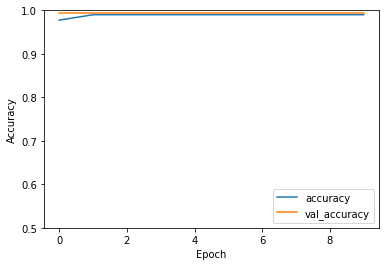

In [11]:

# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=input_shape) (x)
    

# add new classifier layers
flat1 = layers.Flatten()(model)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(10, activation='softmax')(fc2)


# define new model
model = Model(inputs=inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

# define the checkpoint, have a look here for the arguments: https://keras.io/api/callbacks/model_checkpoint/
filepath = "VGG16_for_freakles-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]
batch_size = 32

# Training
history = model.fit(train_images, freakles_train_labels, shuffle = True, steps_per_epoch=len(train_images) // batch_size ,epochs=10,
                    validation_data=(test_images, freakles_test_labels), callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


y_pred1 = model.predict(test_images)
y_pred = np.argmax(y_pred1, axis=1)



# Print f1, precision, accuracy and recall scores
print(f'F1 Score: {f1_score(freakles_test_labels, y_pred , average="weighted")}')
print(f'Precision Score: {precision_score(freakles_test_labels, y_pred , average="weighted")}')
print(f'Recall Score: {recall_score(freakles_test_labels, y_pred , average="weighted")}')
print(f'Accuracy Score: {accuracy_score(freakles_test_labels, y_pred)}')

# Training model for glasses attribute

- Preprocessing: Normalizing i.e. scaling the pixels to 0-1 from 0-255

- Splitting images and attribute for training and testing

- Data Augmentation


In [13]:
#splitting dataset into training and testing
train_images, test_images, glasses_train_labels, glasses_test_labels = train_test_split(img, glasses_labels, test_size=0.2, shuffle = False)

#normalizaiton
train_images, test_images = train_images / 255.0, test_images / 255.0

data_augmentation = keras.Sequential(
    [   #preprocessing.Resizing(height=32, width=32, interpolation="bilinear"),
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        #preprocessing.RandomZoom(0.1),
    ]
)
# the augmentation is being made part of the model. Note that data augmentation is inactive at test time.

# Create a model that includes the augmentation stage
input_shape = (96, 96, 3)
classes = 10


inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)


- Using the built-in Keras code and weights of VGG16

- training the model

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 96, 96, 3)         0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4096)              18878464  
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4097

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


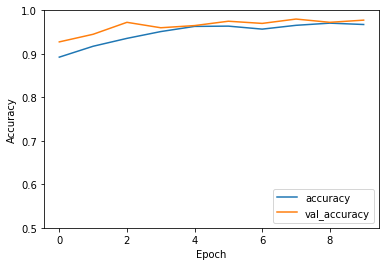

In [14]:

# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=input_shape) (x)
    

# add new classifier layers
flat1 = layers.Flatten()(model)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(10, activation='softmax')(fc2)


# define new model
model = Model(inputs=inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

# define the checkpoint, have a look here for the arguments: https://keras.io/api/callbacks/model_checkpoint/
filepath = "VGG16_for_glasses-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]
batch_size = 32

# Training
history = model.fit(train_images, glasses_train_labels, shuffle = True, steps_per_epoch=len(train_images) // batch_size ,epochs=10,
                    validation_data=(test_images, glasses_test_labels), callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

y_pred1 = model.predict(test_images)
y_pred = np.argmax(y_pred1, axis=1)



# Print f1, precision,  accuracy and recall scores
print(f'F1 Score: {f1_score(glasses_test_labels, y_pred , average="weighted")}')
print(f'Precision Score: {precision_score(glasses_test_labels, y_pred , average="weighted")}')
print(f'Recall Score: {recall_score(glasses_test_labels, y_pred , average="weighted")}')
print(f'Accuracy Score: {accuracy_score(glasses_test_labels, y_pred)}')


# Training model for hair color attribute

- Preprocessing: Normalizing i.e. scaling the pixels to 0-1 from 0-255

- Splitting images and attribute for training and testing

- Data Augmentation


In [15]:
#splitting dataset into training and testing
train_images, test_images, haircolor_train_labels, haircolor_test_labels = train_test_split(images, haircolor_labels, test_size=0.2, shuffle = False)

#normalizaiton
train_images, test_images = train_images / 255.0, test_images / 255.0

data_augmentation = keras.Sequential(
    [   #preprocessing.Resizing(height=32, width=32, interpolation="bilinear"),
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        #preprocessing.RandomZoom(0.1),
    ]
)
# the augmentation is being made part of the model. Note that data augmentation is inactive at test time.

# Create a model that includes the augmentation stage
input_shape = (96, 96, 3)
classes = 10


inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)



- Using the built-in Keras code and weights of VGG16

- training the model

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 96, 96, 3)         0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 4096)              18878464  
_________________________________________________________________
dense_7 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_8 (Dense)              (None, 10)                4097

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


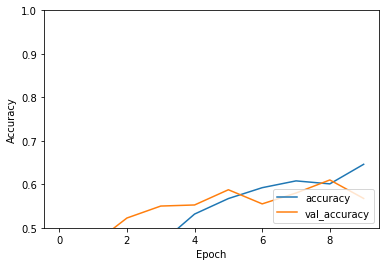

In [16]:
# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=input_shape) (x)
    

# add new classifier layers
flat1 = layers.Flatten()(model)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(10, activation='softmax')(fc2)


# define new model
model = Model(inputs=inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

# define the checkpoint, have a look here for the arguments: https://keras.io/api/callbacks/model_checkpoint/
filepath = "VGG16_for_haircolor-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]
batch_size = 32

# Training
history = model.fit(train_images, haircolor_train_labels, shuffle = True, steps_per_epoch=len(train_images) // batch_size ,epochs=10,
                    validation_data=(test_images, haircolor_test_labels), callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

y_pred1 = model.predict(test_images)
y_pred = np.argmax(y_pred1, axis=1)


# Print f1, precision, accuracy and recall scores
print(f'F1 Score: {f1_score(haircolor_test_labels, y_pred , average="weighted")}')
print(f'Precision Score: {precision_score(haircolor_test_labels, y_pred , average="weighted")}')
print(f'Recall Score: {recall_score(haircolor_test_labels, y_pred , average="weighted")}')
print(f'Accuracy Score: {accuracy_score(haircolor_test_labels, y_pred)}')

# Training model for hair top attribute

- Preprocessing: Normalizing i.e. scaling the pixels to 0-1 from 0-255

- Splitting images and attribute for training and testing

- Data Augmentation



In [17]:
#splitting dataset into training and testing
train_images, test_images, hairtop_train_labels, hairtop_test_labels = train_test_split(images, hairtop_labels, test_size=0.2, shuffle = False)

#normalizaiton
train_images, test_images = train_images / 255.0, test_images / 255.0

data_augmentation = keras.Sequential(
    [   #preprocessing.Resizing(height=32, width=32, interpolation="bilinear"),
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        #preprocessing.RandomZoom(0.1),
    ]
)
# the augmentation is being made part of the model. Note that data augmentation is inactive at test time.

# Create a model that includes the augmentation stage
input_shape = (96, 96, 3)
classes = 10


inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)


- Using the built-in Keras code and weights of VGG16

- training the model

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 96, 96, 3)         0         
_________________________________________________________________
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 4096)              18878464  
_________________________________________________________________
dense_13 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dense_14 (Dense)             (None, 10)                4097

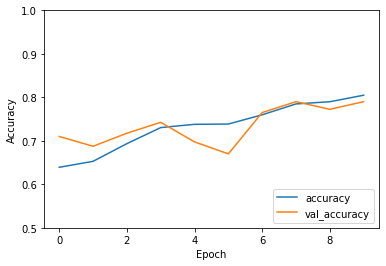

In [19]:

# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=input_shape) (x)
    

# add new classifier layers
flat1 = layers.Flatten()(model)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(10, activation='softmax')(fc2)


# define new model
model = Model(inputs=inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

# define the checkpoint, have a look here for the arguments: https://keras.io/api/callbacks/model_checkpoint/
filepath = "VGG16_for_hairtop-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]
batch_size = 32

# Training
history = model.fit(train_images, hairtop_train_labels, shuffle = True, steps_per_epoch=len(train_images) // batch_size ,epochs=10,
                    validation_data=(test_images, hairtop_test_labels), callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


y_pred1 = model.predict(test_images)
y_pred = np.argmax(y_pred1, axis=1)


# Print f1, precision, accuracy and recall scores
print(f'F1 Score: {f1_score(hairtop_test_labels, y_pred , average="weighted")}')
print(f'Precision Score: {precision_score(hairtop_test_labels, y_pred , average="weighted")}')
print(f'Recall Score: {recall_score(hairtop_test_labels, y_pred , average="weighted")}')
print(f'Accuracy Score: {accuracy_score(hairtop_test_labels, y_pred)}')

# Uploading weights to google drive

In [23]:
from google.colab import auth
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

auth.authenticate_user()

drive_service = build('drive', 'v3')

def save_file_to_drive(name, path):
    file_metadata = {
      'name': name,
      'mimeType': 'application/octet-stream'
     }

    media = MediaFileUpload(path, 
                    mimetype='application/octet-stream',
                    resumable=True)

    created = drive_service.files().create(body=file_metadata,
                                   media_body=media,
                                   fields='id').execute()

    print('File ID: {}'.format(created.get('id')))

    return created

save_file_to_drive('VGG16_for_hairtop.h5', '/content/VGG16_for_hairtop-10-0.7900.h5')

File ID: 1RLON8frFAzkQiZC2As3fuQkD2wdCUaTD


{'id': '1RLON8frFAzkQiZC2As3fuQkD2wdCUaTD'}